1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.

* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math
import scipy.stats
import pandas as pd

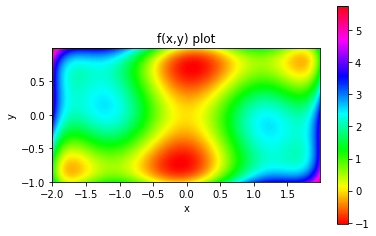

In [24]:
def f(parametri):
    x,y=parametri
    return (4-2.1*𝑥**2+𝑥**4/3)*𝑥**2+𝑥*𝑦+(4*𝑦**2-4)*𝑦**2
    
    
x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x, y, sparse=True)

ext=[x.min(), x.max(), y.min(), y.max()]
plot = plt.imshow(f((xx,yy)), cmap ='hsv', extent=ext)
plt.colorbar(plot)
  
plt.title("f(x,y) plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [58]:
def find_sol(guess, bounds=None):
    if bounds is None: 
        solution = optimize.minimize(f, x0=guess)
    else :
        solution = optimize.minimize(f, x0=guess, bounds=bounds) 
        
    if(solution["success"]==True): return(solution["x"])
    else: return("Errore nella minimizzazione")

guesses= ((0,-0.7),(0,0.7), (0,0))
for sol in map(find_sol, guesses) : 
    print(str(sol)+"\t->\t f(x_y_min)= "+ str(f(sol)))
    
    
"""
La funzione ha due minimi assoluti. La ricerca del minimo attorno a zero restituisce probabilmente un
minimo locale in cui la funzione vale f=0
"""

[ 0.08984201 -0.71265641]	->	 f(x_y_min)= -1.0316284534898772
[-0.08984202  0.71265639]	->	 f(x_y_min)= -1.031628453489876
[0. 0.]	->	 f(x_y_min)= 0.0
[0. 0.]


'\nLa funzione ha due minimi assoluti. La ricerca del minimo attorno a zero restituisce probabilmente un\nminimo locale in cui la funzione vale f=0\n'

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

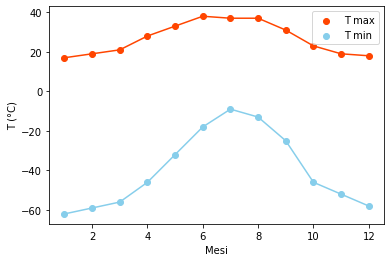

In [2]:
massime= (17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18)
minime= (-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)
months= np.arange(1,13)

fig, ax = plt.subplots()
ax.scatter(months, massime, c="orangered", label="T max")
ax.plot(months, massime, c="orangered")
ax.scatter(months, minime, c="skyblue", label="T min")
ax.plot(months, minime, c="skyblue")
ax.legend()
ax.set_xlabel("Mesi")
ax.set_ylabel("T (°C)")


plt.show()


T_min (mu, sigma, amp, shift): [  7.16452587   1.97590025  52.64929253 -61.3209378 ]
T_max (mu, sigma, amp, shift): [ 6.73581668  2.29443774 23.09209373 15.77930728]


Text(0, 0.5, 'T (°C)')

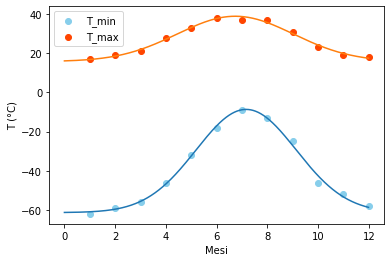

In [5]:
from scipy import special

def f(x, mu, s, l,shift):
    return l*np.exp(-(x-mu)**2/(2*s**2)) + shift

def plot(ax, parametri, temp, name, color):
    mu,s,l,shift=parametri
    ax.scatter(months, temp, color=color, label=name)
    ax.plot(np.arange(0,12,0.01), f(np.arange(0,12,0.01), mu,s,l,shift))
    print(name+" (mu, sigma, amp, shift): "+str(parametri))
    

popt_min, pcov_min = optimize.curve_fit(f, months, minime, p0=[7, 2, 50, -60], full_output=False)
popt_max, pcov_max = optimize.curve_fit(f, months, massime, p0=[7, 3, 20, 18], full_output=False)


fig, ax = plt.subplots()
plot(ax, popt_min, minime, "T_min", "skyblue")
plot(ax, popt_max, massime, "T_max", "orangered")
ax.legend()
ax.set_xlabel("Mesi")
ax.set_ylabel("T (°C)")



chi2= 0.36350143598681317
Pvalue= 2.519041277454269e-07

chi2= 0.5922452171098634
Pvalue= 3.3526708103466956e-06

I P-value calcolati di entrambi i set di dati sono minori della soglia 0.05, e dal grafico si vede come i chi quadri calcolati siano interni alla rejection region, quindi si può rifiutare l'ipotesi nulla di non correlazione e confermare quindi la bontà dei due fit


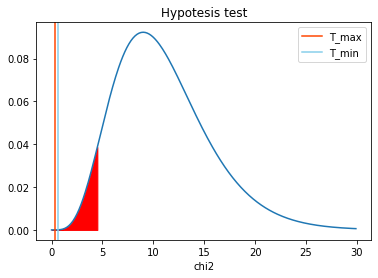

In [21]:
def goodness_fit(temperature, parametri, ax, colore, nome):
    mu,s,l,shift=parametri
    mesi=np.arange(1,13)
    exp=f(mesi, mu, s, l, shift) 
    chi2 = np.sum( (temperature-exp)**2/np.abs(exp))
    print("\nchi2= "+ str(chi2))

    pvalue = scipy.stats.chi2.cdf(chi2, len(temperature)-1)
    print("Pvalue= "+str(pvalue))
    
    ax.axvline(chi2, color=colore, label=nome)


fig, ax = plt.subplots()
p = np.arange(0, 30, 0.1)
ax.plot(p, scipy.stats.chi2.pdf(p, df=len(massime)-1))
range_pvalue=np.arange(0, 4.58, 0.1)
plt.fill_between(range_pvalue,scipy.stats.chi2.pdf(range_pvalue, df=len(massime)-1),color='r')    
ax.set_xlabel("chi2")    
ax.set_title("Hypotesis test")  
    
goodness_fit(massime, popt_max, ax, "orangered", "T_max")
goodness_fit(minime, popt_min, ax, "skyblue", "T_min")

ax.legend()


print("\nI P-value calcolati di entrambi i set di dati sono minori della soglia 0.05, e dal grafico si vede come i \
chi quadri calcolati siano interni alla rejection region, quindi si può rifiutare l'ipotesi nulla di non correlazione \
e confermare quindi la bontà dei due fit")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [2]:
url = 'https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl?dl=1'

data_raw = pd.read_pickle(url)
data= pd.DataFrame(data_raw.item())
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


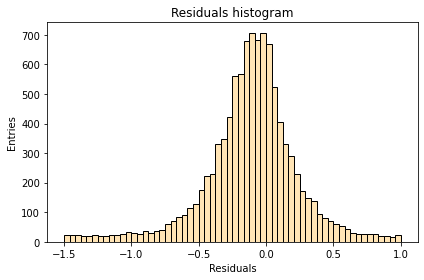

In [3]:
fig, ax = plt.subplots()
h, bins, _ = plt.hist(data["residuals"], bins=60, range=(-1.5, 1), density=False, cumulative=False, color="moccasin", edgecolor='black')
ax.set_title('Residuals histogram')
ax.set_xlabel('Residuals')  
ax.set_ylabel('Entries')  
fig.tight_layout()

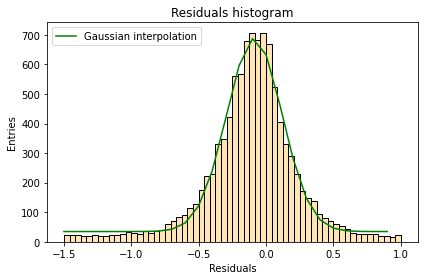

In [4]:
def gauss(x, mu, s, l, shift):
    return l*np.exp(-(x-mu)**2/(2*s**2)) + shift

uncert=np.sqrt(h)  #incertezze con distribuzione poisson
x_bins=(bins[1:]+bins[:-1])/2
popt_g, pcov_g = optimize.curve_fit(gauss, x_bins, h, p0=[0, 1, 2000,10], full_output=False)

range_reg=np.arange(-1.5,1,0.1)
ax.plot(range_reg, gauss(range_reg, popt_g[0],popt_g[1],popt_g[2], popt_g[3]), color="green", label="Gaussian interpolation")
ax.legend()

fig


chi2= 300.6923664919765
Pvalue= 1.0

Il P-value calcolato è ampiamente maggiore della soglia 0.05, e dal grafico si vede come il chi quadro calcolato sia esterno alla rejection region, quindi si deve accettare l'ipotesi nulla di non correlazione e rigettare quindi la bontà del fit


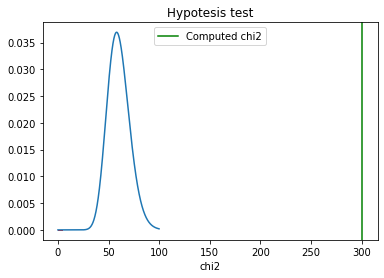

In [5]:
mu,s,l,shift=popt_g
exp=gauss(x_bins, mu, s, l, shift) 
chi2 = np.sum((h-exp)**2/uncert**2)
print("chi2= "+ str(chi2))

pvalue = scipy.stats.chi2.cdf(chi2, len(bins)-1)
print("Pvalue= "+str(pvalue))
   
fig, ax = plt.subplots()
p = np.arange(0, 100, 0.1)
ax.plot(p, scipy.stats.chi2.pdf(p, df=len(bins)-1))
range_pvalue=np.arange(0, 4.58, 0.1)
plt.fill_between(range_pvalue,scipy.stats.chi2.pdf(range_pvalue, df=len(bins)-1),color='r')    
ax.set_xlabel("chi2")    
ax.set_title("Hypotesis test") 
ax.axvline(chi2, color="green", label="Computed chi2")
ax.legend()

print("\nIl P-value calcolato è ampiamente maggiore della soglia 0.05, e dal grafico si vede come il \
chi quadro calcolato sia esterno alla rejection region, quindi si deve accettare l'ipotesi nulla di non correlazione \
e rigettare quindi la bontà del fit")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [22]:
url = 'https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt?dl=1'

data = pd.read_csv(url, header=None, sep=" ", names=["time", "temp"])
data = data[(data["temp"]<50) & (data["temp"]>-50)]

data

,time,temp
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


Best parameters: [a,b,c]= [-9.99725715 -0.24193081  9.25397671]


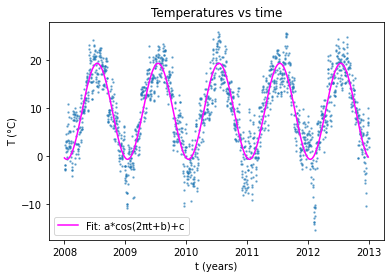

In [76]:
def f(t,a,b,c): 
    return a*np.cos(2*math.pi*t+b)+c

data_8_12=data[(data["time"]>=2008) & (data["time"]<2013)]

popt_f, pcov_f = optimize.curve_fit(f, list(data_8_12["time"]), list(data_8_12["temp"]), p0=[-15, 1 ,10], full_output=False)

def plot(param, label):
    fig, ax = plt.subplots()
    ax.scatter(data_8_12["time"], data_8_12["temp"], s=2, alpha=0.5 )
    x_range=np.arange(2008,2013,0.01)
    ax.plot(x_range, param, color="magenta", label=label)
    ax.set_xlabel("t (years)")  
    ax.set_ylabel("T (°C)")    
    ax.set_title("Temperatures vs time")  
    ax.legend()
    
plot(f(x_range,popt_f[0],popt_f[1],popt_f[2]),"Fit: a*cos(2πt+b)+c")

print("Best parameters: [a,b,c]= " + str(popt_f))

In [71]:
print("Media complessiva exp: <T>= %.3f °C" %np.mean(data["temp"]))
print("Media complessiva fit: <T>= %.3f °C" %popt_f[2])

solution_min = optimize.minimize_scalar(f, method='Brent', args=tuple(popt_f))
if(solution_min["success"]): print("\nColdest average temperature <T>= %.3f °C" %solution_min["fun"])
    
a,b,c=popt_f
solution_max = optimize.minimize_scalar(lambda x,a,b,c: -f(x,a,b,c), method='Brent', args=tuple(popt_f))
if(solution_max["success"]): print("Coldest average temperature <T>= %.3f °C" %(-solution_max["fun"]))

print("\nIl parametro b è uno shift di fase che permette di traslare il grafico lungo l'asse orizzontale, \
ovvero di far coincidere il minimo e massimo della curva di fit con quelli sperimentali.")

Media complessiva exp: <T>= 8.933 °C
Media complessiva fit: <T>= 9.254 °C

Coldest average temperature <T>= -0.743 °C
Coldest average temperature <T>= 19.251 °C

Il parametro b è uno shift di fase che permette di traslare il grafico lungo l'asse orizzontale, ovvero di far coincidere il minimo e massimo della curva di fit con quelli sperimentali.


Best parameters: [a,b,c,d]= [10.00178127  0.99904981 21.18639388  9.2447112 ]


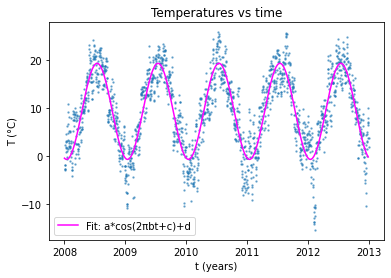

In [78]:
def g(t,a,b,c,d): 
    return a*np.cos(2*math.pi*b*t+c)+d

popt_g, pcov_g = optimize.curve_fit(g, list(data_8_12["time"]), list(data_8_12["temp"]), p0=[10, 1, 10 ,10], full_output=False)

plot(g(x_range,popt_g[0],popt_g[1],popt_g[2],popt_g[3]), "Fit: a*cos(2πbt+c)+d")

print("Best parameters: [a,b,c,d]= " + str(popt_g))